interactive(children=(Dropdown(description='Field', options=('boop',), value='boop'), FloatSlider(value=1.0, d…

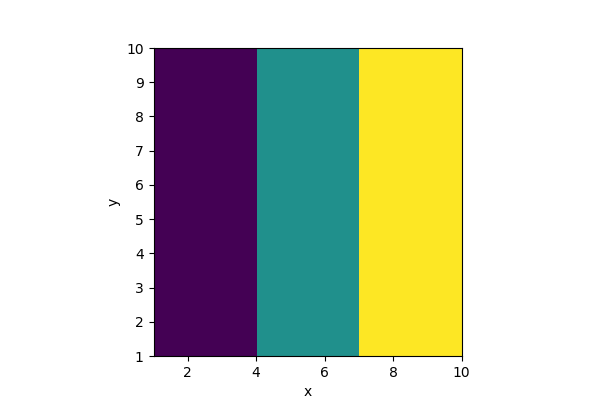

In [ ]:
import FD as FD

import importlib
importlib.reload(FD)
%matplotlib widget

import numpy as np

try:
    m = FD.Model(3)
except Exception as e:
    print(e)


c:\Users\Ephraim\GitHub\FiniteDiff\src\FiniteDiff\FD.py:526: Warning: Overriding values
  warnings.warn("Overriding values", category=Warning)


interactive(children=(Dropdown(description='Field', options=('position', 'slope', 'moment', 'shear'), value='p…

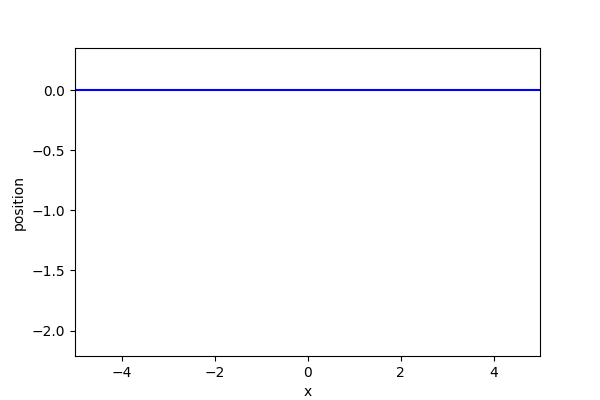

In [3]:
import numpy as np
import FD
m = FD.Model({"x":np.linspace(-5,5,101),"t":np.linspace(1,10,101)},time_axis="t")
%matplotlib widget
y = FD.Field(m,"position",n_time_ders=2)
s = FD.Field(m,"slope",edge_axes = ["x"])
M = FD.Field(m,"moment")
V = FD.Field(m,"shear",edge_axes = ["x"])


y.set_BC("0","x","start")
s.set_BC("0","x","start")
M.set_BC("0","x","end")
V.set_BC("-5","x","end")

y.set_IC("0")
y.dot.set_IC("0")

E = 1
I = 1
lin_dense = 100

e_c = FD.Stencil([-1/2,1/2],1,axis_type="edge",der_axis_type="cell")

c_e = FD.Stencil([-1/2,1/2],1,axis_type="cell",der_axis_type="edge")


while not m.finished:
  
  dydx = c_e.der(y.prev,"x")

  s.assign_update(dydx)

  dsdx = e_c.der(s.new,"x")

  M.assign_update(E*I*dsdx)

  dMdx = c_e.der(M.new,"x")

  V.assign_update(dMdx)

  dVdx = e_c.der(V.new,"x")

  a = dVdx/lin_dense

  y.dot.dot.assign_update(a)

  y.dot.time_integrate_update()

  y.time_integrate_update()


  m.increment_time()

m.interact()

Finite approximation: f'' = [f(x-h) - 2f(x+0h) + f(x+h)] / [h^2]

Boundary conditions and initial conditions may be in conflict for field boop
Conflicting values override and become equal to whatever was assigned last

Boundary conditions and initial conditions may be in conflict for field boop
Conflicting values override and become equal to whatever was assigned last

All initial conditions set!

CFL: 2.469, must be under 0.5 for stability



c:\Users\Ephraim\GitHub\FiniteDiff\src\FiniteDiff\FD.py:1071: RuntimeWarning: overflow encountered in divide
  derivative /= dx**stencil.der_order
c:\Users\Ephraim\GitHub\FiniteDiff\src\FiniteDiff\FD.py:791: RuntimeWarning: overflow encountered in multiply
  new_data = operation(operand_data[0], operand_data[1])
c:\Users\Ephraim\GitHub\FiniteDiff\src\FiniteDiff\FD.py:791: RuntimeWarning: invalid value encountered in add
  new_data = operation(operand_data[0], operand_data[1])
c:\Users\Ephraim\GitHub\FiniteDiff\src\FiniteDiff\FD.py:1056: RuntimeWarning: invalid value encountered in add
  section_derivative += weights[i]*f.data[idxs]


This is possibly due to insufficent boundary conditions



interactive(children=(Dropdown(description='Field', options=('boop', 'boop dot'), value='boop'), FloatSlider(v…

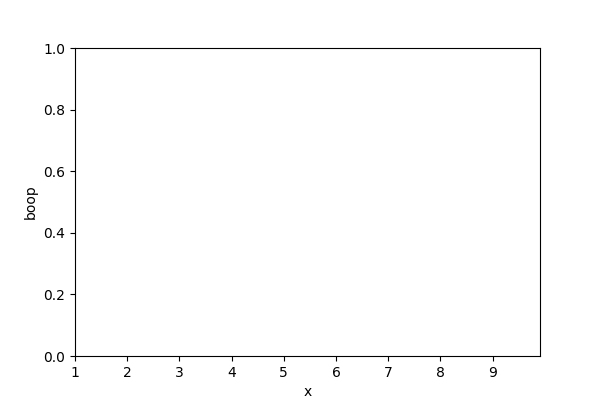

In [268]:
import numpy as np
import importlib
importlib.reload(FD)


k = 2
dx = 0.1
dt = 0.01

m = FD.Model({"x":np.arange(1,10,dx),"t":np.arange(0,10,dt)},"t")#,periodic=["x"])


d2 = FD.Stencil([-1,0,1],der_order=2)

f = FD.Field(m,"boop",n_time_ders = 1)
f.set_IC("1")

f.set_BC("0","x","start")
f.set_BC("0","x","end")



m.check_IC()

CFL = k*dt/dx**2

print(f"CFL: {round(CFL,3)}, must be under 0.5 for stability\n")

while not m.finished:

    fxx = k * d2.der(f.prev,"x")

    f.dot.assign_update(fxx)
    f.time_integrate_update()


    m.increment_time()

m.interact()

In [235]:
np.arange(1,10,.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])